In [508]:
import numpy as np
import re
import pandas as pd
from sklearn import preprocessing, model_selection
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
import scipy as sp

from sklearn.linear_model import LinearRegression, LassoCV, LassoLarsCV, LassoLarsIC, Ridge, Lasso

import statsmodels.api as sm
from statsmodels.tools import eval_measures
import statsmodels.formula.api as smf

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.regression.linear_model import OLS

###  Project Introduction

1. Apartment Renting Price Analysis using linear Regression

2. Data: Each row is an apartment

   (1) Response Variable: price 
   
   (2) Dependent Variable: 
           numerical: sqft(area), bedrooms, bathrooms
           categorical: pet, laundry, parking, county, state
   
    
2. Preprocessing: 

   (1) collecting data: web-scraping from cragslist
       packages: lxml.html, requests, requests_cache
       using re to select attributes and features --> form a dataframe
      
   (2) cleaning data: deleted (no longer available)
                      keep useful columns
                      summarize numerical and categorical data (plots)
                      detect outliers --> correct or delete
                      fill in missing values: check text 
   
   (3) split train test data
 
3. Model Building
   
   (1) Transform y_train --> log
   
   (2) Standardize
   
   (3) Correlation Matrix among numerical values --> high corr
   
   (4) Main Effect Model --> F good, all categorical data significant, and model good
   
   (5) Add interactions? sqft*bedrooms, sqft*bathrooms, bedrooms*bathrooms
       

In [2]:
cl_apartments = pd.read_csv("cl_apartments.csv")

In [7]:
cl_apartments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21948 entries, 0 to 21947
Data columns (total 21 columns):
Unnamed: 0      21948 non-null int64
title           21947 non-null object
text            21947 non-null object
latitude        21864 non-null float64
longitude       21864 non-null float64
city_text       20287 non-null object
date_posted     21947 non-null object
date_updated    8809 non-null object
price           21845 non-null float64
deleted         21948 non-null bool
sqft            16357 non-null float64
bedrooms        20900 non-null float64
bathrooms       20900 non-null float64
pets            21655 non-null object
laundry         21732 non-null object
parking         21649 non-null object
craigslist      21948 non-null object
place           21247 non-null object
city            20092 non-null object
state           21853 non-null object
county          21853 non-null object
dtypes: bool(1), float64(6), int64(1), object(13)
memory usage: 3.4+ MB


In [369]:
clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15876 entries, 0 to 15875
Data columns (total 9 columns):
Unnamed: 0    15876 non-null int64
price         15876 non-null int64
sqft          15876 non-null int64
bedrooms      15876 non-null int64
bathrooms     15876 non-null float64
pets          15876 non-null object
laundry       15876 non-null object
parking       15876 non-null object
county        15876 non-null object
dtypes: float64(1), int64(4), object(4)
memory usage: 1.1+ MB


In [480]:
X, y = clean.iloc[:, 2:9], clean.iloc[:, 1]

In [406]:
X_train.describe()

,sqft,bedrooms,bathrooms
count,10636.000000,10636.000000,10636.000000
mean,869.235709,1.518052,1.367055
std,293.564447,0.755829,0.522823
min,3.000000,0.000000,0.000000
25%,680.000000,1.000000,1.000000
50%,835.000000,2.000000,1.000000
75%,1020.000000,2.000000,2.000000
max,5210.000000,5.000000,6.000000


In [481]:
X_dummy = pd.get_dummies(X)

In [482]:
X_train_dummy, X_test_dummy, y_train, y_test = model_selection.train_test_split(X_dummy, y, test_size=0.33)

In [351]:
model0 = smf.ols('price ~ sqft + bedrooms + bathrooms + C(pets) + C(laundry) + C(parking) + C(county)',
                 data = clean.iloc[:,1:9]).fit()

In [483]:
train = clean.iloc[X_train_dummy.index, 1:9]
X_train = train.iloc[:, 1:8]

In [366]:
model0 = smf.ols('price ~ sqft + bedrooms + bathrooms + C(pets) + C(laundry) + C(parking) + C(county)',
                 data = train).fit()

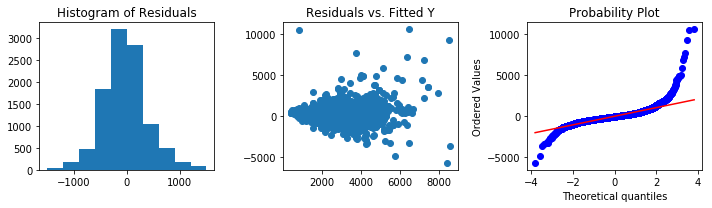

In [375]:
plt.figure(figsize=(10,3))

plt.subplot(131)
plt.hist(y_train - model0.predict(X_train), range=[-1500, 1500])
plt.title("Histogram of Residuals")

plt.subplot(132)
plt.scatter(model0.predict(X_train), y_train - model0.predict(X_train))
plt.title("Residuals vs. Fitted Y")

ax = plt.subplot(133)
stats.probplot(y_train - model0.predict(X_train), plot = ax, fit=True)
plt.tight_layout()


In [402]:
model = smf.ols('np.log(price) ~ sqft + bedrooms + bathrooms + C(pets) + C(laundry) + C(parking) + C(county)',
                 data = train).fit()

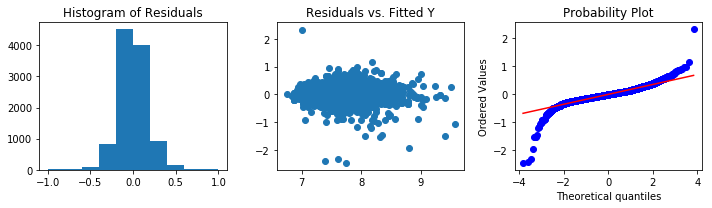

In [404]:
plt.figure(figsize=(10,3))

plt.subplot(131)
plt.hist(np.log(y_train) - model.predict(X_train), range = [-1, 1])
plt.title("Histogram of Residuals")

plt.subplot(132)
plt.scatter(model.predict(X_train), np.log(y_train) - model.predict(X_train))
plt.title("Residuals vs. Fitted Y")

ax = plt.subplot(133)
stats.probplot(np.log(y_train) - model.predict(X_train), plot = ax, fit=True)
plt.tight_layout()

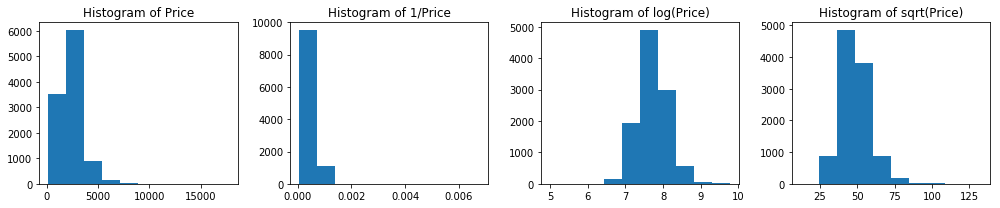

In [378]:
plt.figure(figsize=(14,3))

plt.subplot(141)
plt.hist(y_train)
plt.title("Histogram of Price")

plt.subplot(142)
plt.hist(1/y_train)
plt.title("Histogram of 1/Price")

plt.subplot(143)
plt.hist(np.log(y_train))
plt.title("Histogram of log(Price)")

plt.subplot(144)
plt.hist(np.sqrt(y_train))
plt.title("Histogram of sqrt(Price)")

plt.tight_layout()

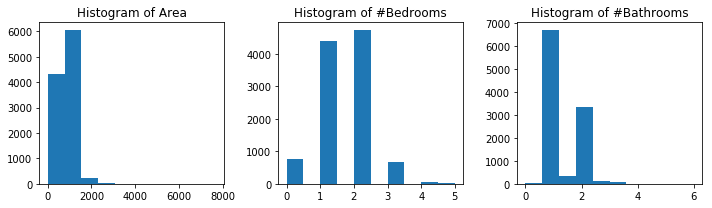

In [281]:
plt.figure(figsize=(10,3))
plt.subplot(131)
plt.hist(X_train.sqft)
plt.title("Histogram of Area")

plt.subplot(132)
plt.hist(X_train.bedrooms)
plt.title("Histogram of #Bedrooms")

plt.subplot(133)
plt.hist(X_train.bathrooms)
plt.title("Histogram of #Bathrooms")

plt.tight_layout()

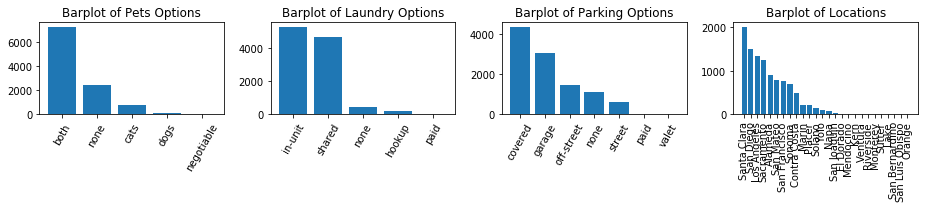

In [90]:
plt.figure(figsize=(13,3))
plt.subplot(141)
plt.bar(X_train.pets.value_counts().index, X_train.pets.value_counts().values)
plt.xticks(X_train.pets.value_counts().index, X_train.pets.value_counts().index, rotation=60)
plt.title("Barplot of Pets Options")

plt.subplot(142)
plt.bar(X_train.laundry.value_counts().index, X_train.laundry.value_counts().values)
plt.xticks(X_train.laundry.value_counts().index, X_train.laundry.value_counts().index, rotation=60)
plt.title("Barplot of Laundry Options")

plt.subplot(143)
plt.bar(X_train.parking.value_counts().index, X_train.parking.value_counts().values)
plt.xticks(X_train.parking.value_counts().index, X_train.parking.value_counts().index, rotation=60)
plt.title("Barplot of Parking Options")

plt.subplot(144)
plt.bar(X_train.county.value_counts().index, X_train.county.value_counts().values)
plt.xticks(X_train.county.value_counts().index, X_train.county.value_counts().index, rotation=90)
plt.title("Barplot of Locations")
plt.tight_layout()

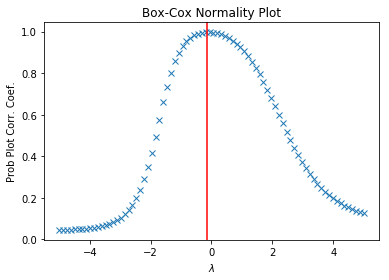

In [282]:
fig = plt.figure()
ax = fig.add_subplot(111)
prob = stats.boxcox_normplot(y_train, -5, 5, plot=ax)
_, maxlog = stats.boxcox(y_train)
ax.axvline(maxlog, color='r')

In [484]:
log_y_train = np.log(y_train)

In [485]:
log_y_test = np.log(y_test)

In [453]:
X_train_S = X_train[:]
X_train_S.iloc[:, 0:3] = preprocessing.scale(X_train_S.iloc[:, 0:3])
X_train_S.describe()
X_train_dummy_S = X_train_dummy[:]
X_train_dummy_S.iloc[:, 0:3] =  preprocessing.scale(X_train_dummy_S.iloc[:, 0:3])

/Users/sylviaz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
/Users/sylviaz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """


In [423]:
[vif(X_train.iloc[:, 0:3].values, i) for i in range(3)]

[12.30064180690518, 12.830346973628702, 1.1550296427952673]

In [424]:
[vif(X_train_S.iloc[:, 0:3].values, i) for i in range(3)]

[2.761267792510718, 2.5871404283815598, 2.1156008482348003]

In [488]:
train = pd.concat([log_y_train, X_train], axis = 1)
train_or = pd.concat([log_y_train, X.iloc[X_train.index, :]], axis = 1)

In [489]:
train_initial = pd.concat([y_train, X_train], axis = 1)

Text(0.5, 1.0, 'Correlation Matrix')

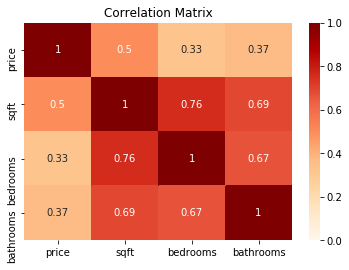

In [381]:
sns.heatmap(train.iloc[:, 0:4].corr(), annot=True, cmap="OrRd", vmin = 0)
plt.title("Correlation Matrix")

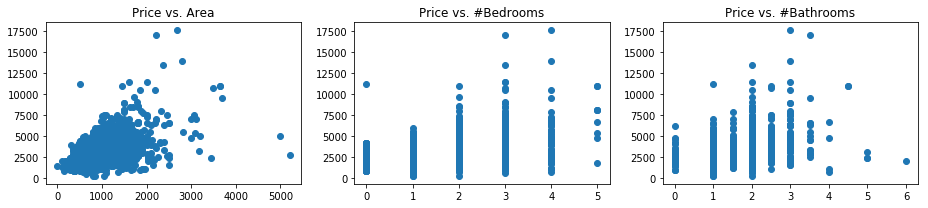

In [385]:
plt.figure(figsize=(13,3))

plt.subplot(131)
plt.scatter(X_train.sqft, y_train)
plt.title("Price vs. Area")

plt.subplot(132)
plt.scatter(X_train.bedrooms, y_train)
plt.title("Price vs. #Bedrooms")

plt.subplot(133)
plt.scatter(X_train.bathrooms, y_train)
plt.title("Price vs. #Bathrooms")

plt.tight_layout()

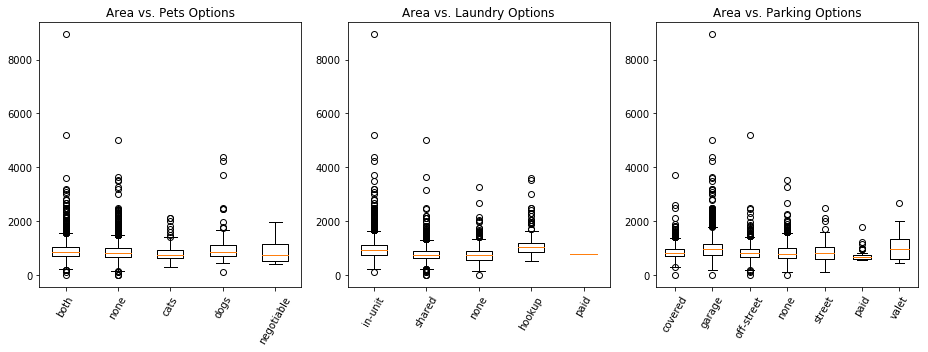

In [116]:
plt.figure(figsize=(13,5))

plt.subplot(131)
plt.boxplot([X_train[X_train.pets == i].sqft for i in X_train.pets.value_counts().index], 
            labels = X_train.pets.value_counts().index)
plt.xticks(rotation=60)
plt.title("Area vs. Pets Options")

plt.subplot(132)
plt.boxplot([X_train[X_train.laundry == i].sqft for i in X_train.laundry.value_counts().index], 
            labels = X_train.laundry.value_counts().index)
plt.xticks(rotation=60)
plt.title("Area vs. Laundry Options")

plt.subplot(133)
plt.boxplot([X_train[X_train.parking == i].sqft for i in X_train.parking.value_counts().index], 
            labels = X_train.parking.value_counts().index)
plt.xticks(rotation=60)
plt.title("Area vs. Parking Options")

plt.tight_layout()

Text(0.5, 1.0, 'Area vs. Location')

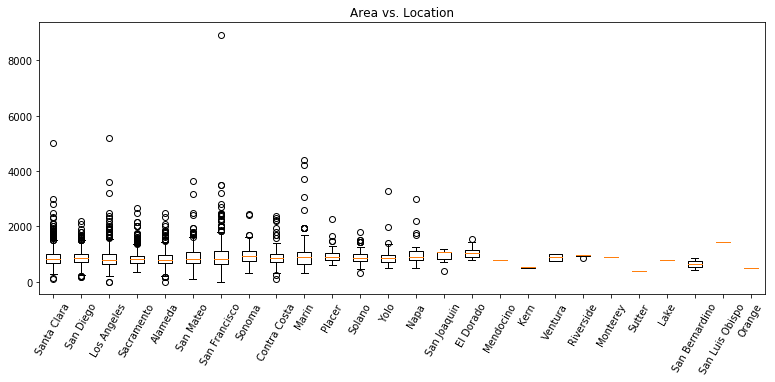

In [141]:
plt.figure(figsize=(13,5))

plt.boxplot([X_train[X_train.county == i].sqft for i in X_train.county.value_counts().index], 
            labels = X_train.county.value_counts().index)
plt.xticks(rotation=60)
plt.title("Area vs. Location")

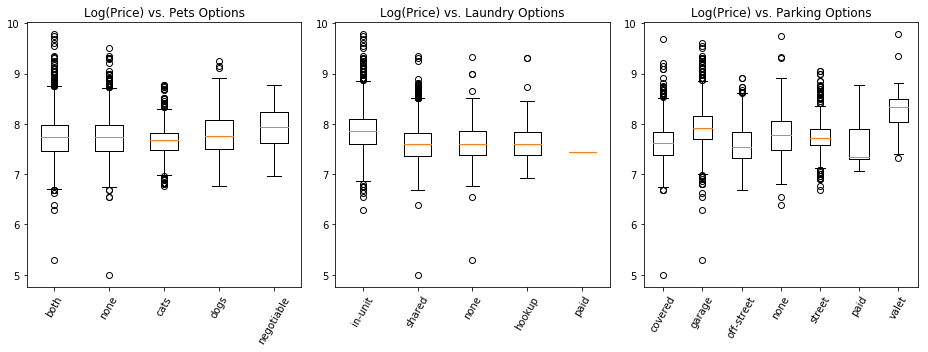

In [126]:
plt.figure(figsize=(13,5))

plt.subplot(131)
plt.boxplot([train[train.pets == i].price for i in train.pets.value_counts().index], 
            labels = train.pets.value_counts().index)
plt.xticks(rotation=60)
plt.title("Log(Price) vs. Pets Options")

plt.subplot(132)
plt.boxplot([train[train.laundry == i].price for i in train.laundry.value_counts().index], 
            labels = train.laundry.value_counts().index)
plt.xticks(rotation=60)
plt.title("Log(Price) vs. Laundry Options")

plt.subplot(133)
plt.boxplot([train[train.parking == i].price for i in train.parking.value_counts().index], 
            labels = train.parking.value_counts().index)
plt.xticks(rotation=60)
plt.title("Log(Price) vs. Parking Options")

plt.tight_layout()

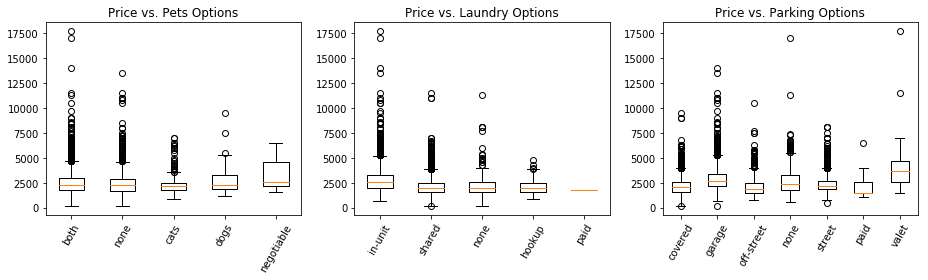

In [388]:
plt.figure(figsize=(13,4))

plt.subplot(131)
plt.boxplot([train_initial[train_initial.pets == i].price for i in train_initial.pets.value_counts().index], 
            labels = train_initial.pets.value_counts().index)
plt.xticks(rotation=60)
plt.title("Price vs. Pets Options")

plt.subplot(132)
plt.boxplot([train_initial[train_initial.laundry == i].price for i in train_initial.laundry.value_counts().index], 
            labels = train_initial.laundry.value_counts().index)
plt.xticks(rotation=60)
plt.title("Price vs. Laundry Options")

plt.subplot(133)
plt.boxplot([train_initial[train_initial.parking == i].price for i in train_initial.parking.value_counts().index], 
            labels = train_initial.parking.value_counts().index)
plt.xticks(rotation=60)
plt.title("Price vs. Parking Options")

plt.tight_layout()

Text(0.5, 1.0, 'Price vs. Location')

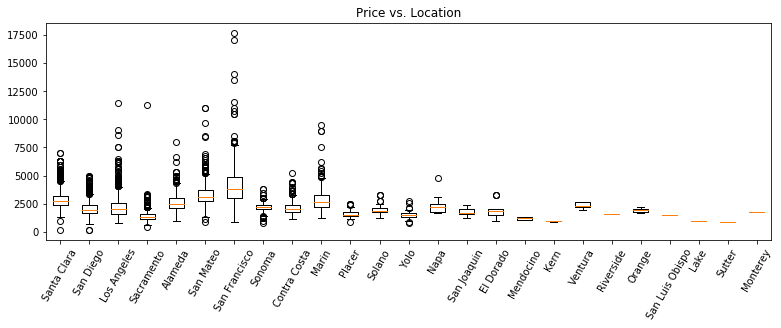

In [390]:
plt.figure(figsize=(13,4))

plt.boxplot([train_initial[train_initial.county == i].price for i in train_initial.county.value_counts().index], 
            labels = train_initial.county.value_counts().index)
plt.xticks(rotation=60)
plt.title("Price vs. Location")

In [490]:
X_train.iloc[:, 0:3] = preprocessing.scale(X_train.iloc[:, 0:3])
X_test.iloc[:, 0:3] = preprocessing.scale(X_test.iloc[:, 0:3])
train_dummy = pd.concat([log_y_train, X_train], axis = 1)
test_dummy = pd.concat([log_y_test, X_test], axis = 1)

/Users/sylviaz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


In [312]:
X_train = sm.add_constant(X_train)
model = sm.OLS(log_y_train, X_train).fit()
model.summary()

/Users/sylviaz/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     931.6
Date:                Sun, 22 Mar 2020   Prob (F-statistic):               0.00
Time:                        15:17:56   Log-Likelihood:                 2916.2
No. Observations:               10636   AIC:                            -5750.
Df Residuals:                   10595   BIC:                            -5452.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      4.6113      0.011    417.913      0.000       4.590       4.633
sqft                       0.0983      0.003     33.073      0.000       0.092       0.104
bedrooms                   0.0391      0.003     13.339      0.000       0.033       0.045
bathrooms                  0.0303      0.003     11.401      0.000       0.025       0.035
pets_both                  0.9516      0.010     96.037      0.000       0.932       0.971
pets_cats                  0.8963      0.011     81.317      0.000       0.875       0.918
pets_dogs                  0.9548      0.018     52.123      0.000       0.919       0.991
pets_negotiable            0.8987      0.041     21.935      0.000       0.818       0.979
pets_none                  0.9098      0.010     90.139      0.000       0.890       0.930
laundry_hookup             1.1095      0.011    103.027      0.000       1.088       1.131
laundry_in-unit            1.2691      0.005    246.618      0.000       1.259       1.279
laundry_none               1.1049      0.009    127.783      0.000       1.088       1.122
laundry_paid            1.064e-15   1.29e-16      8.221      0.000     8.1e-16    1.32e-15
laundry_shared             1.1278      0.005    221.480      0.000       1.118       1.138
parking_covered            0.5526      0.008     69.258      0.000       0.537       0.568
parking_garage             0.6465      0.008     80.118      0.000       0.631       0.662
parking_none               0.6330      0.009     71.074      0.000       0.616       0.651
parking_off-street         0.5818      0.009     67.154      0.000       0.565       0.599
parking_paid               0.6579      0.028     23.611      0.000       0.603       0.712
parking_street             0.5911      0.010     58.616      0.000       0.571       0.611
parking_valet              0.9483      0.039     24.153      0.000       0.871       1.025
county_Alameda             0.5284      0.013     40.319      0.000       0.503       0.554
county_Contra Costa        0.3341      0.014     23.654      0.000       0.306       0.362
county_El Dorado          -0.0431      0.045     -0.967      0.334      -0.130       0.044
county_Kern               -0.2448      0.060     -4.051      0.000      -0.363      -0.126
county_Lake               -0.2746      0.126     -2.183      0.029      -0.521      -0.028
county_Los Angeles         0.3379      0.013     26.413      0.000       0.313       0.363
county_Marin               0.5745      0.016     34.892      0.000       0.542       0.607
county_Mendocino          -0.1561      0.064     -2.446      0.014      -0.281      -0.031
county_Monterey            0.2328      0.103      2.251      0.024       0.030       0.436
county_Napa                0.2723      0.023     11.645      0.000       0.226  

In [316]:
model.eigenvals

array([2.63173451e+04, 2.53377381e+04, 5.89162949e+03, 3.79006986e+03,
       3.64526354e+03, 3.07119208e+03, 2.51161546e+03, 1.89910838e+03,
       1.53583037e+03, 1.42785255e+03, 1.24723460e+03, 1.16072958e+03,
       1.03943031e+03, 1.01540771e+03, 8.62146225e+02, 7.86461361e+02,
       6.77407916e+02, 5.56676489e+02, 5.00497515e+02, 4.65747206e+02,
       2.87402016e+02, 2.56183119e+02, 1.80428906e+02, 1.50305268e+02,
       1.14152527e+02, 1.02403648e+02, 8.02439342e+01, 4.15925070e+01,
       3.80022842e+01, 1.91315624e+01, 1.81793049e+01, 1.65768733e+01,
       9.79872668e+00, 8.27574207e+00, 6.27549916e+00, 5.20166826e+00,
       4.16539575e+00, 3.20213911e+00, 2.97720382e+00, 2.12283816e+00,
       1.99495426e+00, 6.19791174e-27, 1.08305091e-27, 9.82793431e-28,
       2.86559551e-28, 1.49958836e-28, 5.25231836e-29])

In [306]:
F_pets, p_pets = stats.f_oneway(*[train_or[train_or.pets==i].price for i in train_or.pets.value_counts().index])

In [307]:
F_laundry, p_laundry = stats.f_oneway(*[train_or[train_or.laundry==i].price 
                                        for i in train_or.laundry.value_counts().index])

In [308]:
F_county, p_county = stats.f_oneway(*[train_or[train_or.county==i].price 
                                      for i in train_or.county.value_counts().index])

In [309]:
F_parking, p_parking = stats.f_oneway(*[train_or[train_or.parking==i].price 
                                        for i in train_or.parking.value_counts().index])

In [311]:
p_pets, p_laundry, p_county, p_parking

(6.259644809037117e-07, 7.361817708570119e-303, 0.0, 4.7014772e-316)

In [294]:
# Interactions

X_train_in = pd.concat([X_train.sqft * X_train.bedrooms, 
                        X_train.sqft * X_train.bathrooms, 
                        X_train.bedrooms * X_train.bathrooms,
                        X_train], axis = 1)

In [324]:
model0 = sm.OLS(log_y_train, X_train_in.iloc[:, 6:49]).fit()
print(model0.aic)

[print(sm.OLS(log_y_train, 
              pd.concat([X_train_in.iloc[:, i], X_train_in.iloc[:, 6:49]], axis = 1)).fit().aic) 
       for i in range(6)]

# --> + sqft

[print(sm.OLS(log_y_train, 
              pd.concat([X_train_in.iloc[:, i], X_train_in.iloc[:, 3], X_train_in.iloc[:, 6:49]], axis = 1)).fit().aic) 
       for i in [0,1,2,4,5]]

# --> + bedrooms

708.3728102115383
-1150.4243291735802
-1520.1776188224358
-1120.9067736049801
-5286.1090724349415
-3523.379206442798
-1891.5009653940579
-5285.004352834272
-5285.200452328107
-5285.6996839631465
-5622.73784630232
-5575.279296013905


[None, None, None, None, None]

In [325]:
[print(sm.OLS(log_y_train, 
              pd.concat([X_train_in.iloc[:, i], X_train_in.iloc[:, 3:5], X_train_in.iloc[:, 6:49]], axis = 1)).fit().aic) 
       for i in [0,1,2,5]]

# --> not - sqrt or - bedrooms
# --> + bathrooms

-5622.257591794158
-5633.320584844623
-5628.11711648132
-5750.423862403637


[None, None, None, None]

In [326]:
print(sm.OLS(log_y_train, 
              pd.concat([X_train_in.iloc[:, 3], 
                         X_train_in.iloc[:, 5], 
                         X_train_in.iloc[:, 6:49]], axis = 1)).fit().aic) 

[print(sm.OLS(log_y_train, 
              pd.concat([X_train_in.iloc[:, i], X_train_in.iloc[:, 3:6], X_train_in.iloc[:, 6:49]], axis = 1)).fit().aic) 
       for i in [0,1,2]]

# --> not - any variable
# --> + bedrooms * bathrooms

-5575.279296013905
-5748.424291017662
-5748.557728030864
-5756.022653411419


[None, None, None]

In [327]:
print(sm.OLS(log_y_train, 
             pd.concat([X_train_in.iloc[:, 2], 
                        X_train_in.iloc[:, 3], 
                        X_train_in.iloc[:, 4], 
                        X_train_in.iloc[:, 6:49]], axis = 1)).fit().aic) 

print(sm.OLS(log_y_train, 
             pd.concat([X_train_in.iloc[:, 2], 
                        X_train_in.iloc[:, 3], 
                        X_train_in.iloc[:, 5], 
                        X_train_in.iloc[:, 6:49]], axis = 1)).fit().aic) 

print(sm.OLS(log_y_train, 
             pd.concat([X_train_in.iloc[:, 2], 
                        X_train_in.iloc[:, 4], 
                        X_train_in.iloc[:, 5], 
                        X_train_in.iloc[:, 6:49]], axis = 1)).fit().aic) 

[print(sm.OLS(log_y_train, 
              pd.concat([X_train_in.iloc[:, 2],
                         X_train_in.iloc[:, i],
                         X_train_in.iloc[:, 3:6], X_train_in.iloc[:, 6:49]], axis = 1)).fit().aic) 
       for i in [0, 1]]

# --> + bedrooms * bathrooms

-5628.11711648132
-5609.4634625932085
-4603.390869338509
-5764.7879229468745
-5766.29566346464


[None, None]

In [222]:
print(sm.OLS(log_y_train, 
             pd.concat([X_train_dummy_in.iloc[:, 2], 
                        X_train_dummy_in.iloc[:, 3:6], 
                        X_train_dummy_in.iloc[:, 6:49]], axis = 1)).fit().aic) 

print(sm.OLS(log_y_train, 
             pd.concat([X_train_dummy_in.iloc[:, 0], 
                        X_train_dummy_in.iloc[:, 2],                    
                        X_train_dummy_in.iloc[:, 4:6], 
                        X_train_dummy_in.iloc[:, 6:49]], axis = 1)).fit().aic) 

print(sm.OLS(log_y_train, 
             pd.concat([X_train_dummy_in.iloc[:, 0], 
                        X_train_dummy_in.iloc[:, 2], 
                        X_train_dummy_in.iloc[:, 3], 
                        X_train_dummy_in.iloc[:, 5], 
                        X_train_dummy_in.iloc[:, 6:49]], axis = 1)).fit().aic) 

print(sm.OLS(log_y_train, 
             pd.concat([X_train_dummy_in.iloc[:, 0], 
                        X_train_dummy_in.iloc[:, 2], 
                        X_train_dummy_in.iloc[:, 3:5], 
                        X_train_dummy_in.iloc[:, 6:49]], axis = 1)).fit().aic) 

print(sm.OLS(log_y_train, 
             X_train_dummy_in).fit().aic) 



-5240.1835940509045
-4345.856889628107
-5112.5936268417645
-5172.673283723518
-5252.842411311387


### AIC: + sqft$*$bedrooms + bedrooms$*$bathrooms

In [328]:
model0 = sm.OLS(log_y_train, X_train_in.iloc[:, 6:49]).fit()
print(model0.bic)

[print(sm.OLS(log_y_train, 
              pd.concat([X_train_in.iloc[:, i], X_train_in.iloc[:, 6:49]], axis = 1)).fit().bic) 
       for i in range(6)]

# --> + sqft

[print(sm.OLS(log_y_train, 
              pd.concat([X_train_in.iloc[:, i], X_train_in.iloc[:, 3], X_train_in.iloc[:, 6:49]], axis = 1)).fit().bic) 
       for i in [0,1,2,4,5]]

# --> + bedrooms

984.7088008013288
-866.8163388314267
-1236.5696284802823
-837.2987832628266
-5002.501082092788
-3239.7712161006443
-1607.8929750519044
-4994.124362739756
-4994.320462233591
-4994.819693868631
-5331.857856207804
-5284.399305919389


[None, None, None, None, None]

In [329]:
[print(sm.OLS(log_y_train, 
              pd.concat([X_train_in.iloc[:, i], X_train_in.iloc[:, 3:5], X_train_in.iloc[:, 6:49]], axis = 1)).fit().bic) 
       for i in [0,1,2,5]]
# --> + bathrooms

-5324.105601947278
-5335.168594997744
-5329.965126634441
-5452.271872556757


[None, None, None, None]

In [330]:
print(sm.OLS(log_y_train, 
              pd.concat([X_train_in.iloc[:, 3], 
                         X_train_in.iloc[:, 5], 
                         X_train_in.iloc[:, 6:49]], axis = 1)).fit().bic) 

[print(sm.OLS(log_y_train, 
              pd.concat([X_train_in.iloc[:, i], X_train_in.iloc[:, 3:6], X_train_in.iloc[:, 6:49]], axis = 1)).fit().bic) 
       for i in [0,1,2]]

# --> + sqft * bedrooms

-5284.399305919389
-5443.000301418419
-5443.133738431622
-5450.598663812177


[None, None, None]

In [332]:
print(sm.OLS(log_y_train, 
             pd.concat([X_train_in.iloc[:, 0], 
                        X_train_in.iloc[:, 3], 
                        X_train_in.iloc[:, 4], 
                        X_train_in.iloc[:, 6:49]], axis = 1)).fit().bic) 

print(sm.OLS(log_y_train, 
             pd.concat([X_train_in.iloc[:, 0], 
                        X_train_in.iloc[:, 3], 
                        X_train_in.iloc[:, 5], 
                        X_train_in.iloc[:, 6:49]], axis = 1)).fit().bic) 

print(sm.OLS(log_y_train, 
             pd.concat([X_train_in.iloc[:, 0], 
                        X_train_in.iloc[:, 4], 
                        X_train_in.iloc[:, 5], 
                        X_train_in.iloc[:, 6:49]], axis = 1)).fit().bic) 

[print(sm.OLS(log_y_train, 
              pd.concat([X_train_in.iloc[:, 0],
                         X_train_in.iloc[:, i],
                         X_train_in.iloc[:, 3:6], X_train_in.iloc[:, 6:49]], axis = 1)).fit().bic) 
       for i in [1,2]]

# Remain

-5324.105601947278
-5278.902907096064
-4490.046738694891
-5434.034648882027
-5452.091933595269


[None, None]

### BIC: + sqft$*$bedrooms

In [498]:
train_S = train[:]
train_S.price = np.log(train_S.price)
train_S.iloc[:, 1:4] = preprocessing.scale(train_S.iloc[:, 1:4])

/Users/sylviaz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until


In [532]:
model1 = smf.ols('price ~ sqft + bedrooms + bathrooms + C(pets) + C(laundry) + C(parking) + C(county)',
                 data = train_S).fit()
model2 = smf.ols('price ~ sqft*bedrooms + sqft + bedrooms + bathrooms + C(pets) + C(laundry) + C(parking) + C(county)',
                 data = train_S).fit()

In [533]:
sum((model1.predict(train_S.iloc[:, 1:]) - log_y_train)**2)

344608.75521690026

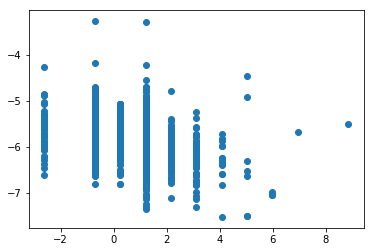

In [537]:
plt.scatter(train_S.bathrooms,(model1.predict(train_S.iloc[:, 1:]) - log_y_train))

In [504]:
sum((model2.predict(train_S.iloc[:, 1:]) - log_y_train)**2)

344608.69113833643

In [505]:
new_model1 = smf.ols('price ~ sqft + bedrooms + bathrooms + C(pets) + C(laundry) + C(parking) + C(county)',
                     data = train_S).fit_regularized('elastic_net')
sum((new_model1.predict(train_S.iloc[:, 1:]) - log_y_train)**2)

344600.7257272921

In [512]:
def ridge_regression(X, y, alpha):
    #Fit the model
    ridgereg = Ridge(alpha=alpha,normalize=True)
    ridgereg.fit(X, y)
    y_pred = ridgereg.predict(X)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-y)**2)
    ret = [rss]
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)
    return ret

#Initialize predictors to be set of 15 powers of x
predictors=[X]
predictors.extend(['x_%d'%i for i in range(2,16)])

#Set the different values of lambda to be tested
alpha_ridge = [0, 1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10]

#Initialize the dataframe for storing coefficients.
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,47)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

for i in range(10):
    coef_matrix_ridge.iloc[i,] = ridge_regression(X_train_dummy_S, log_y_train, alpha_ridge[i])

/Users/sylviaz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=4.27229e-18): result may not be accurate.
  overwrite_a=True).T


In [513]:
coef_matrix_ridge

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,...,coef_x_37,coef_x_38,coef_x_39,coef_x_40,coef_x_41,coef_x_42,coef_x_43,coef_x_44,coef_x_45,coef_x_46
alpha_0,1620.35,-6.10135e+12,-0.0064912,-0.00493797,0.00874707,-1.45972e+12,-1.45972e+12,-1.45972e+12,-1.45972e+12,-1.45972e+12,...,-1.51381e+11,-1.51381e+11,-1.51381e+11,-1.51381e+11,-1.51381e+11,-1.51381e+11,-1.51381e+11,-1.51381e+11,-1.51381e+11,-1.51381e+11
alpha_1e-15,1619.45,7.76061,-0.00739969,-0.00503932,0.00883132,-0.0129693,-0.00322047,0.0499208,0.272225,-0.0151055,...,-0.0376023,-0.074811,-0.419387,-0.0456266,-0.0298667,-0.057057,-0.057647,-0.0308648,-0.274517,-0.0855401
alpha_1e-10,1619.45,7.72639,-0.00739969,-0.00503932,0.00883132,-0.00274681,0.00700197,0.0601433,0.282448,-0.00488307,...,2.06513e-05,-0.037188,-0.381764,-0.00800359,0.00775629,-0.019434,-0.020024,0.00675823,-0.236894,-0.0479171
alpha_1e-08,1619.45,7.72639,-0.00739969,-0.00503932,0.00883132,-0.00274651,0.00700227,0.0601436,0.282448,-0.00488278,...,2.07739e-05,-0.0371879,-0.381763,-0.00800346,0.00775641,-0.0194339,-0.0200239,0.00675835,-0.236894,-0.047917
alpha_0.0001,1619.45,7.72639,-0.00739731,-0.00503872,0.00882841,-0.00274615,0.00700172,0.0601369,0.282418,-0.00488241,...,2.21229e-05,-0.0371842,-0.381728,-0.00800287,0.00775569,-0.0194327,-0.0200216,0.00675896,-0.23687,-0.0479133
alpha_0.001,1619.45,7.72639,-0.00737597,-0.00503334,0.00880228,-0.00274287,0.00699678,0.0600767,0.282147,-0.00487914,...,3.42358e-05,-0.0371515,-0.381407,-0.00799756,0.00774924,-0.019422,-0.0200016,0.00676435,-0.236654,-0.0478802
alpha_0.01,1619.45,7.72637,-0.00717009,-0.00497951,0.00854875,-0.00271074,0.00694773,0.0594834,0.279475,-0.00484647,...,0.000153529,-0.0368273,-0.378218,-0.00794407,0.00768528,-0.0193147,-0.019803,0.00681247,-0.234517,-0.0475518
alpha_1,1621.48,7.7254,-0.00202605,-0.00233364,0.00183345,-0.00130539,0.00387363,0.0296966,0.139818,-0.00265031,...,0.00381367,-0.0192632,-0.191841,-0.00405022,0.00399279,-0.0112597,-0.0094216,0.00418371,-0.116923,-0.0271211
alpha_5,1625.03,7.7247,-0.000576938,-0.000821037,0.000368591,-0.000427671,0.00134095,0.010083,0.0468425,-0.000924754,...,0.00231011,-0.00669388,-0.0634355,-0.0012513,0.00134324,-0.00408319,-0.00306747,0.00132972,-0.0383926,-0.00988569
alpha_10,1626.17,7.72452,-0.000306673,-0.000457332,0.000178262,-0.000229078,0.000731234,0.00553756,0.0256021,-0.000511861,...,0.0014116,-0.00369267,-0.0345128,-0.000661865,0.000731832,-0.00227324,-0.00166826,0.000712257,-0.0208457,-0.00551269


In [511]:
def lasso_regression(X, y, alpha):
    #Fit the model
    lassoreg = Lasso(alpha=alpha,normalize=True, max_iter=1e5)
    lassoreg.fit(X,y)
    y_pred = lassoreg.predict(X)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-y)**2)
    ret = [rss]
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    return ret

#Initialize predictors to all 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

#Define the alpha values to test
alpha_lasso = [0, 1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5]

#Initialize the dataframe to store coefficients
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,47)]
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,10)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

#Iterate over the 10 alpha values:
for i in range(10):
    coef_matrix_lasso.iloc[i,] = lasso_regression(X_train_dummy_S, log_y_train, alpha_lasso[i])

/Users/sylviaz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  after removing the cwd from sys.path.
/Users/sylviaz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/sylviaz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/sylviaz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precisi

In [514]:
coef_matrix_lasso

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,...,coef_x_37,coef_x_38,coef_x_39,coef_x_40,coef_x_41,coef_x_42,coef_x_43,coef_x_44,coef_x_45,coef_x_46
alpha_0,1619.45,7.7259,-0.00739969,-0.00503932,0.00883132,-0.00379476,0.00595402,0.0590953,0.2814,-0.00593103,...,0.00173019,-0.0354785,-0.380054,-0.00629405,0.00946582,-0.0177245,-0.0183144,0.00846776,-0.235185,-0.0462076
alpha_1e-15,1619.45,7.7259,-0.00739969,-0.00503932,0.00883132,-0.00379474,0.00595404,0.0590953,0.2814,-0.00593101,...,0.00173017,-0.0354785,-0.380054,-0.00629407,0.0094658,-0.0177245,-0.0183145,0.00846774,-0.235185,-0.0462076
alpha_1e-10,1619.45,7.72674,-0.00739966,-0.0050393,0.00883129,-0.00170489,0.00804385,0.0611851,0.283489,-0.00384113,...,0.000173411,-0.037035,-0.38161,-0.00785077,0.00790904,-0.0192812,-0.0198712,0.00690996,-0.236741,-0.0477643
alpha_1e-08,1619.45,7.73749,-0.007397,-0.00503785,0.00882757,0,0.00974534,0.0628786,0.285165,-0.00213445,...,0,-0.0371933,-0.381678,-0.00802279,0.00773099,-0.0194489,-0.020042,0.0066305,-0.236868,-0.0479307
alpha_1e-05,1619.91,7.73635,-0.0047033,-0.00360865,0.00516455,0,0.00629875,0.0513646,0.255632,-0.00028735,...,0,-0.0205826,-0.274631,-0.00562863,0.00412207,-0.0125156,-0.016543,0,-0.189133,-0.0398489
alpha_0.0001,1627.59,7.72447,-0,-0,0,-0,0,0,0.00761722,-0,...,0,-0,-0,-0,0,-0,-0,0,-0,-0
alpha_0.001,1627.76,7.7243,-0,-0,0,-0,0,0,0,-0,...,0,-0,-0,-0,0,-0,-0,0,-0,-0
alpha_0.01,1627.76,7.7243,-0,-0,0,-0,0,0,0,-0,...,0,-0,-0,-0,0,-0,-0,0,-0,-0
alpha_1,1627.76,7.7243,-0,-0,0,-0,0,0,0,-0,...,0,-0,-0,-0,0,-0,-0,0,-0,-0
alpha_5,1627.76,7.7243,-0,-0,0,-0,0,0,0,-0,...,0,-0,-0,-0,0,-0,-0,0,-0,-0


In [522]:
ridgereg = Ridge(alpha=0,normalize=False)
ridgereg.fit(X_train_dummy_S, log_y_train)
y_pred = ridgereg.predict(X_train_dummy_S)

In [524]:
lr = LinearRegression()
lr.fit(X_train_dummy_S, log_y_train)
y_pred = ridgereg.predict(X_train_dummy_S)
y_pred - log_y_train

9984     0.097141
6667     0.385170
6021     0.268354
14180   -0.108441
281     -0.587018
1716     0.434826
299      0.104982
14616   -0.188786
7115     0.091582
13835   -0.052513
11515   -0.152384
7455    -0.119126
10433    0.300454
15574   -1.825752
6053    -0.105481
7997    -0.283711
2871     0.467692
5033    -0.016144
11408   -0.644255
15703   -0.356093
6657     0.197774
8130     0.122304
7240    -0.049942
3378     0.144098
12511   -0.181681
2564     0.840804
13157   -0.344733
5786     0.427140
1226     0.301891
607     -0.123151
           ...   
5653    -0.374807
9587     0.094960
14763   -0.762526
762      0.366205
1728    -0.640453
4540     0.290441
15573   -0.645096
8562    -0.254700
11190   -0.182673
141     -0.270635
1273     0.310366
11127   -0.221735
8043    -0.655433
6944    -0.073285
12849   -0.116966
8383    -0.042857
11275   -0.188216
12326   -0.073285
8344    -0.171002
4738     0.093643
11551   -0.259653
8113    -0.431241
12284   -0.613746
7226     0.200991
7218     0

In [321]:
X_test_2 = pd.concat([X_test.sqft * X_test.bedrooms, X_test], axis = 1)

In [251]:
# Cross Validation
cv_results = model_selection.cross_validate(LinearRegression(), 
                                            X_train_dummy, log_y_train, scoring = "neg_mean_squared_error", cv=8)

In [252]:
cv_results

/Users/sylviaz/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


{'fit_time': array([0.07794309, 0.03537512, 0.01630163, 0.01610231, 0.01539207,
        0.01413488, 0.01490402, 0.01849794]),
 'score_time': array([0.00868416, 0.00265288, 0.00508022, 0.00201392, 0.0015409 ,
        0.0032022 , 0.0015378 , 0.00226903]),
 'test_score': array([-4.24224786e-02, -1.94063829e+16, -1.56402655e+17, -3.65101842e-02,
        -2.50751742e+20, -3.31151581e-02, -3.40270253e-02, -3.82735818e-02]),
 'train_score': array([-0.03453033, -0.03606991, -0.03534065, -0.03538348, -0.03523069,
        -0.03586816, -0.03577327, -0.03994758])}

In [259]:
cv_results = model_selection.cross_validate(LinearRegression(), 
                                            pd.concat([X_train_dummy_in.iloc[:, 0], 
                                                       X_train_dummy_in.iloc[:, 3:49]], axis = 1), 
                                            log_y_train, scoring = "neg_mean_squared_error", cv=8)

In [260]:
cv_results

/Users/sylviaz/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


{'fit_time': array([0.02736211, 0.05179977, 0.0227499 , 0.01379514, 0.01451302,
        0.01358509, 0.01342988, 0.01377106]),
 'score_time': array([0.00265789, 0.00219584, 0.00240302, 0.00181293, 0.00168395,
        0.00196695, 0.00166297, 0.00164199]),
 'test_score': array([-4.23088288e-02, -3.50105614e+19, -2.12887626e+18, -3.63845096e-02,
        -1.91240628e+20, -3.38981433e-02, -3.52890947e-02, -3.38484453e-02]),
 'train_score': array([-0.03447409, -0.03596752, -0.03601366, -0.03533193, -0.03529605,
        -0.03678328, -0.03841958, -0.03568407])}

In [338]:
eval_measures.mse(log_y_train, model1.predict(X_train)), eval_measures.mse(log_y_test, model1.predict(sm.add_constant(X_test)))

(0.03383554653115318, 0.038068420102554866)

In [334]:
eval_measures.mse(log_y_train, model2.predict(pd.concat([X_train.sqft * X_train.bedrooms, X_train], axis = 1))),


0.03383554516763404

In [323]:
eval_measures.mse(log_y_test, model1.predict(sm.add_constant(X_test)))

0.038068420102554866

In [273]:
X_test_dummy

,sqft,bedrooms,bathrooms,pets_both,pets_cats,pets_dogs,pets_negotiable,pets_none,laundry_hookup,laundry_in-unit,...,county_San Diego,county_San Francisco,county_San Joaquin,county_San Mateo,county_Santa Clara,county_Solano,county_Sonoma,county_Sutter,county_Ventura,county_Yolo
4349,-0.044283,0.645273,1.214017,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9606,-0.726867,-0.661230,-0.700929,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6425,0.551729,0.645273,1.214017,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8875,1.240972,0.645273,1.214017,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
10717,-0.100888,-0.661230,-0.700929,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
7793,0.371926,1.951775,1.214017,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4576,-0.660274,-0.661230,-0.700929,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6284,0.881367,0.645273,1.214017,1,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
12368,0.864719,0.645273,1.214017,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
280,3.801495,0.645273,1.214017,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
